In [26]:
import math
import numpy as np

In [27]:
# Parameter Values
S0 = 100. # initial index level
K = 105. # strike price
T = 1.0 # time-to-maturity
r = 0.05 # riskless short rate
sigma = 0.2 # volatility

In [28]:
I = 100000 # number of simulations

In [29]:
np.random.seed(1000) 

In [30]:
z = np.random.standard_normal(I) # pseudo-random numbers

In [31]:
ST = S0 * np.exp((r - sigma ** 2 / 2) * T + sigma * math.sqrt(T) * z) # index values at maturity

In [32]:
hT = np.maximum(ST - K, 0) # payoff at maturity

In [33]:
C0 = math.exp(-r * T) * np.mean(hT) # Monte Carlo estimator

In [34]:
print('Value of the European call option: {:5.3f}.'.format(C0))

Value of the European call option: 8.019.


# --------------------------------------------------------------------------------------

In [35]:
import pandas as pd
from pylab import plt, mpl

In [36]:
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [42]:
data = pd.read_csv('data/tr_eikon_eod_data.csv', index_col=0, parse_dates=True)
data = pd.DataFrame(data['.SPX'])
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   .SPX    2138 non-null   float64
dtypes: float64(1)
memory usage: 33.4 KB


In [43]:
data['rets'] = np.log(data / data.shift(1))
data['vola'] = data['rets'].rolling(252).std() * np.sqrt(252)

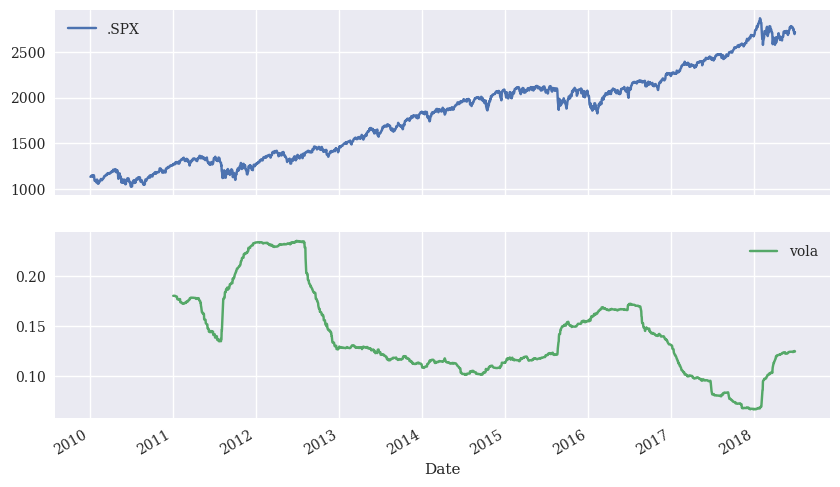

In [45]:
data[['.SPX', 'vola']].plot(subplots=True, figsize=(10, 6))
plt.show()

In [48]:
import math
loops = 250000
a = range(1, loops)
def f(x):
    return 3 * math.log(x) * math.cos(x) ** 2
%timeit r = [f(x) for x in a]

46.2 ms ± 473 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [49]:
import numpy as np
a = np.arange(1, loops)
%timeit r=3 * np.log(a) + np.cos(a) ** 2

3.09 ms ± 42.1 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [50]:
import numexpr as ne
ne.set_num_threads(1)
f = '3 * log(a) * cos(a) ** 2'
%timeit r = ne.evaluate(f)

2 ms ± 7.58 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [51]:
ne.set_num_threads(4)
%timeit r = ne.evaluate(f)

699 μs ± 10.8 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [54]:
import eikon as ek

In [69]:
data = pd.read_csv("data/tr_eikon_aapl_tick.csv", index_col=0, parse_dates=True)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14985 entries, 2018-06-29 16:00:00.026000 to 2018-06-29 16:59:59.093000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VALUE   14965 non-null  float64
 1   VOLUME  14985 non-null  float64
dtypes: float64(2)
memory usage: 351.2 KB


In [71]:
data.tail()

,VALUE,VOLUME
Date,,
2018-06-29 16:59:59.090,186.1350,200.0
2018-06-29 16:59:59.091,186.1400,100.0
2018-06-29 16:59:59.091,186.1400,100.0
2018-06-29 16:59:59.092,186.1389,100.0
2018-06-29 16:59:59.093,186.1375,400.0


In [105]:
data = pd.read_csv('data/tr_eikon_eod_data.csv', index_col=0, parse_dates=True)
data = pd.DataFrame(data['AAPL.O'])
data['Returns'] = np.log(data / data.shift())
data.dropna(inplace=True)

In [106]:
lags = 6

In [107]:
cols = []
for lag in range(1, lags+1):
    col = 'lag_{}'.format(lag)
    data[col] = np.sign(data['Returns'].shift(lag))
    cols.append(col)
data.dropna(inplace=True)

In [108]:
data

,AAPL.O,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
Date,,,,,,,,
2010-01-13,30.092827,0.014007,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2010-01-14,29.918542,-0.005808,1.0,-1.0,-1.0,1.0,-1.0,-1.0
2010-01-15,29.418542,-0.016853,-1.0,1.0,-1.0,-1.0,1.0,-1.0
2010-01-20,30.246398,-0.015536,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2010-01-21,29.724542,-0.017404,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,-0.014983,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
2018-06-26,184.430000,0.012330,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
2018-06-27,184.160000,-0.001465,1.0,-1.0,-1.0,-1.0,1.0,-1.0


In [109]:
from sklearn.svm import SVC

In [110]:
model = SVC(gamma='auto')

In [111]:
model.fit(data[cols], np.sign(data['Returns']))

SVC(gamma='auto')

In [112]:
data['Prediction'] = model.predict(data[cols])

In [113]:
data

,AAPL.O,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,Prediction
Date,,,,,,,,,
2010-01-13,30.092827,0.014007,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0
2010-01-14,29.918542,-0.005808,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2010-01-15,29.418542,-0.016853,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0
2010-01-20,30.246398,-0.015536,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0
2010-01-21,29.724542,-0.017404,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,-0.014983,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
2018-06-26,184.430000,0.012330,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2018-06-27,184.160000,-0.001465,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0


In [118]:
data['Prediction'] * data['Returns']

Date
2010-01-13    0.014007
2010-01-14   -0.005808
2010-01-15    0.016853
2010-01-20   -0.015536
2010-01-21   -0.017404
                ...   
2018-06-25    0.014983
2018-06-26    0.012330
2018-06-27    0.001465
2018-06-28    0.007250
2018-06-29    0.002105
Length: 2055, dtype: float64

In [115]:
data['Strategy'] = data['Prediction'] * data['Returns']

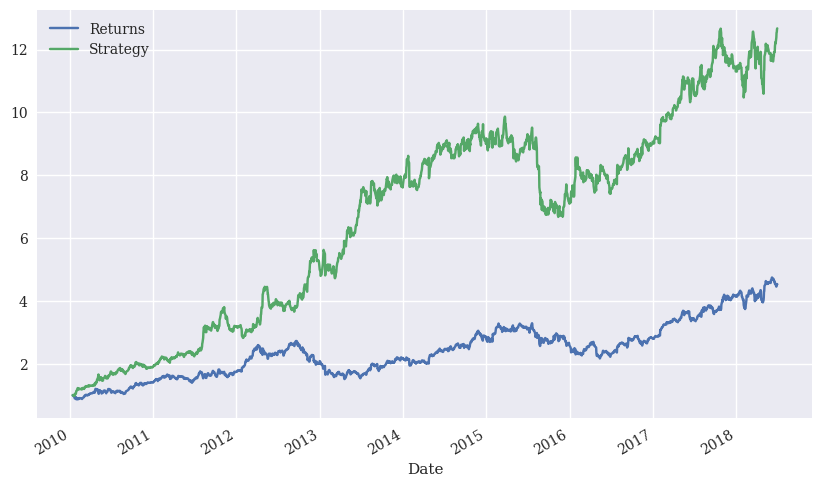

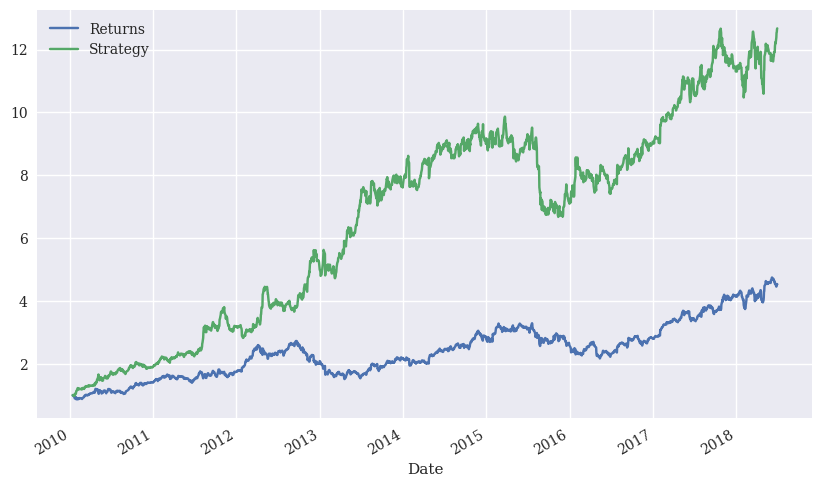

In [117]:
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))
plt.show()